In [1]:
#pip install sklearn==1.1.3 


In [2]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
# Load data
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy', 'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast', 'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
df = pd.DataFrame(dataset_dict)

In [4]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play
0,sunny,85.0,85.0,False,No
1,sunny,80.0,90.0,True,No
2,overcast,83.0,78.0,False,Yes
3,rainy,70.0,96.0,False,Yes
4,rainy,68.0,80.0,False,Yes


In [5]:
# Prepare data
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

In [6]:
df.head()

,Temperature,Humidity,Wind,Play,overcast,rainy,sunny
0,85.0,85.0,0,0,0,0,1
1,80.0,90.0,1,0,0,0,1
2,83.0,78.0,0,1,1,0,0
3,70.0,96.0,0,1,0,1,0
4,68.0,80.0,0,1,0,1,0


In [7]:
# Split data
X, y = df.drop(columns='Play'), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)


In [8]:
# Train model
dt_clf = DecisionTreeClassifier(
    max_depth=None,           # Maximum depth of the tree
    min_samples_split=2,      # Minimum number of samples required to split an internal node
    min_samples_leaf=1,       # Minimum number of samples required to be at a leaf node
    criterion='gini'          # Function to measure the quality of a split
)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
# Make predictions
y_pred = dt_clf.predict(X_test)


In [10]:
# Evaluate model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7142857142857143


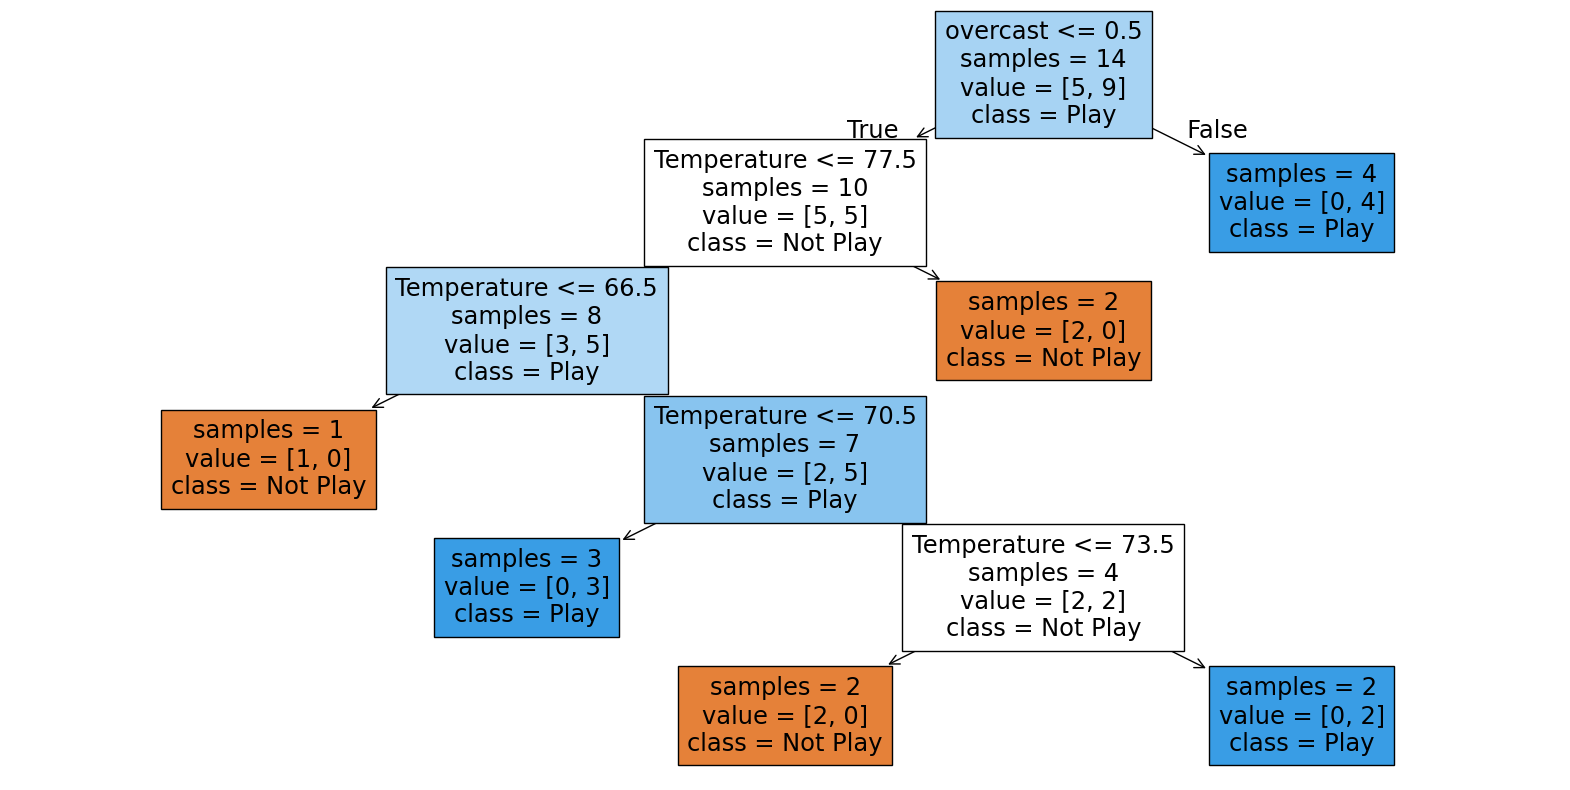

In [11]:
# Visualize tree
plt.figure(figsize=(20, 10))
plot_tree(dt_clf, filled=True, feature_names=X.columns,
          class_names=['Not Play', 'Play'], impurity=False)
plt.show()